# StackOverflow 2023 Survey Data, analysis based on work model

##### Business Questions (Business Understanding)

* How old are the developers? What are your development stacks? In which country do they work? What is the employment model? What are the main programming languages? 


* How much is remote work related to the developer's age?


* How much is remote work related to the developer stack?


* How much does remote work relate to the country where you work?


* In-person work pays more than remote work? We will see this relationship according to the countries that pay the most according to the work model. 

##### Data Understanding

Next, we want to move each of the business questions to data understanding:

`1.` How old are the developers? What are your development stacks? In which country do they work? What is the employment model? What are the main programming languages?

**To answer this question we will read the survey dataframe and analyze the columns. See which columns have fewer null values to have an analysis with reduced error.**

`2.` How much is remote work related to the developer's age?

**To answer this survey we will be analyzing the data from the age and type of work column.**


`3.` How much is remote work related to the developer stack?

**To answer this survey we will be analyzing the data from the developer stack and type of work column,** 

`4.`How much does remote work relate to the country where you work?

**To answer this survey we will be analyzing the data from the countries and type of work column**

`5.` In-person work pays more than remote work? We will see this relationship according to the countries that pay the most according to the work model. 

**To answer this question we will be analyzing the parents and converted salary (USD) columns. We will group the 10 highest paying countries according to the type of work.**

##### Data Preparation & Results

None of our questions really involve machine learning or predictive models of any kind. 
But this will be continued in the future in new versions of this project in order to improve analyzes and make predictions.

In [1]:
import pandas as pd
from pathlib import Path
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt



df_survey = pd.read_csv('datalake/stack-overflow-developer-survey-2023/survey_results_public.csv')
df_schema = pd.read_csv('datalake/stack-overflow-developer-survey-2023/survey_results_schema.csv')

In [2]:
schema_dict = df_schema[['qname','question']].iloc[4:].to_dict('records')

In [3]:
df_na = df_survey.isna().mean().reset_index().rename(columns={0:'null_ratio'})
dfnacutoff = df_na[df_na['null_ratio'] <= 0.5]

In [4]:
dfnacutoff.shape[0]/df_survey.shape[1]

0.6547619047619048

In [5]:
dfnacutoff

,index,null_ratio
0,ResponseId,0.000000
1,Q120,0.000000
2,MainBranch,0.000000
3,Age,0.000000
4,Employment,0.014420
5,RemoteWork,0.172385
6,CodingActivities,0.172901
7,EdLevel,0.013579
8,LearnCode,0.017055
9,LearnCodeOnline,0.214164


# Studying the variables
Let's analyze the type of work people do
, according to your age,
according to years of experience, according to the country and according to the type of staff they work


`1.` How old are the developers? What are your development stacks? In which country do they work? What is the employment model? What are the main programming languages?


In [6]:

(df_survey.Age.value_counts().sort_values(ascending=False)/df_survey.shape[0]).to_frame()

,Age
25-34 years old,0.372791
35-44 years old,0.230221
18-24 years old,0.201056
45-54 years old,0.093447
Under 18 years old,0.046286
55-64 years old,0.038034
65 years or older,0.013130
Prefer not to say,0.005035


In [7]:
(df_survey.DevType.value_counts().sort_values(ascending=False)/df_survey.shape[0]).to_frame()

,DevType
"Developer, full-stack",0.288561
"Developer, back-end",0.154120
"Developer, front-end",0.056860
"Developer, desktop or enterprise applications",0.043775
Other (please specify):,0.034535
"Developer, mobile",0.029120
Engineering manager,0.022796
Student,0.022381
"Developer, embedded applications or devices",0.020688
Data scientist or machine learning specialist,0.017806


In [8]:
((df_survey.Country.value_counts().sort_values(ascending=False)/df_survey.shape[0])).head(30).to_frame()

,Country
United States of America,0.209085
Germany,0.082167
India,0.063072
United Kingdom of Great Britain and Northern Ireland,0.062253
Canada,0.039323
France,0.032887
Poland,0.027303
Netherlands,0.026720
Australia,0.023300
Brazil,0.022896


In [9]:
(df_survey.RemoteWork.value_counts().sort_values(ascending=False)/df_survey.shape[0]).to_frame()

,RemoteWork
"Hybrid (some remote, some in-person)",0.349065
Remote,0.342730
In-person,0.135820


In [10]:
dfLanguageHaveWorkedWith = df_survey.LanguageHaveWorkedWith.value_counts().reset_index()

In [11]:
dfLanguageHaveWorkedWith.head()

,index,LanguageHaveWorkedWith
0,HTML/CSS;JavaScript;TypeScript,1487
1,Python,1132
2,HTML/CSS;JavaScript,735
3,HTML/CSS;JavaScript;PHP;SQL,718
4,C#,649


In [12]:
all_lang = []
for i in dfLanguageHaveWorkedWith['index']:
    add = i.split(';')
    for language in add:
        if language not in all_lang:
            all_lang.append(language)

In [13]:
dfLanguageHaveWorkedWith.head()

,index,LanguageHaveWorkedWith
0,HTML/CSS;JavaScript;TypeScript,1487
1,Python,1132
2,HTML/CSS;JavaScript,735
3,HTML/CSS;JavaScript;PHP;SQL,718
4,C#,649


In [14]:
def total_count(df, col1, col2, look_for):
    
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx]) 
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('LanguageHaveWorkedWith', ascending=False, inplace=True)
    return new_df

In [15]:
dfLanguages = total_count(dfLanguageHaveWorkedWith, 'index', 'LanguageHaveWorkedWith', all_lang)


In [16]:
dfLanguages.head()

,index,LanguageHaveWorkedWith
14,C,65678
7,Java,63638
1,JavaScript,55711
0,HTML/CSS,46396
3,Python,43158




`2.` How much is remote work related to the developer's age?


In [17]:
df_char1 = df_survey[['RemoteWork','Age']]
df_char1 =df_survey.groupby(by=['Age','RemoteWork']).count()['ResponseId']
df_char1 = df_char1.reset_index().pivot('Age', 'RemoteWork', 'ResponseId')
df_char1.index = ['18-24', '25-34', '35-44',
       '45-54', '55-64', '65+',
       'No awnser', '-18']

df_char1_perc = df_char1.div(df_char1.sum(axis=1), axis=0)

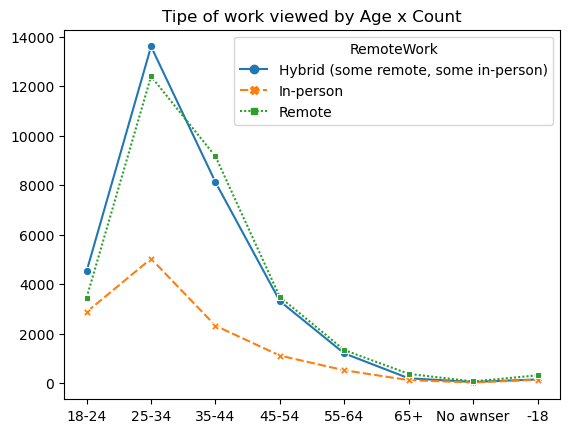

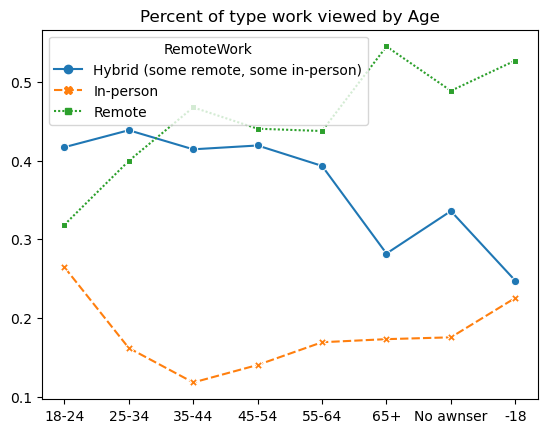

In [18]:

sns.lineplot(data=df_char1,markers=True).set_title('Tipe of work viewed by Age x Count')
plt.show()
sns.lineplot(data=df_char1_perc,markers=True).set_title('Percent of type work viewed by Age')
plt.show()


We can see that the majority of people who responded to the survey are between 25-34 years old, and that they mostly work
in a hybrid model.
However, we can see that the group where there are more people working remotely would be the group of people over 65 years old.
And at all ages, **people work less in a fully in-person job.**


`3.` How much is remote work related to the developer stack?


In [19]:
df_char2 = df_survey[['RemoteWork','DevType']]
df_char2 =df_survey.groupby(by=['DevType','RemoteWork']).count()['ResponseId']
df_char2 = df_char2.reset_index().pivot('DevType', 'RemoteWork', 'ResponseId')


In [20]:
# Function to see, depending on the type of developer, their type of work
def plot_bystack(df,stacks):
    temp = df[df.index.isin(stacks)]
    sns.lineplot(data=temp,markers=True).set_title('Tipe of work viewed by DevType x Count')
    plt.xticks(rotation=5)
    plt.show()
    
    df_perc = df.div(df.sum(axis=1), axis=0)
    temp_perc = df_perc[df_perc.index.isin(stacks)]
    plt.xticks(rotation=5)
    sns.lineplot(data=temp_perc,markers=True).set_title('Percent of type work viewed by DevType')
    plt.show()

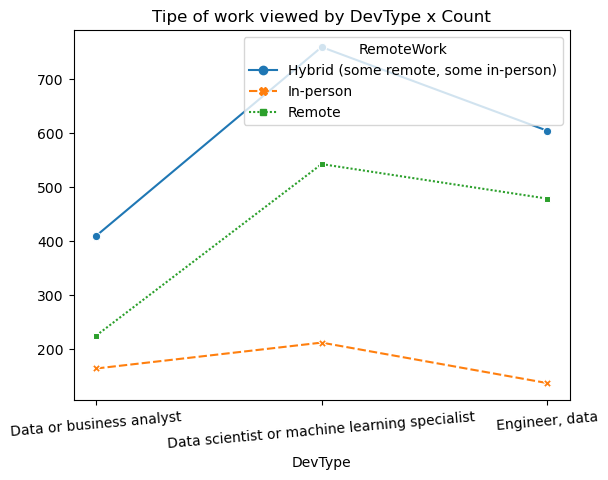

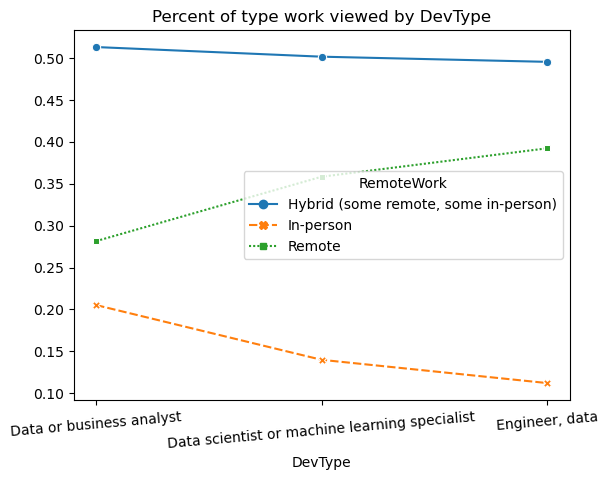

In [21]:
plot_bystack(df_char2,['Data or business analyst','Engineer, data','Data scientist or machine learning specialist'])



We can see that for professions in the data field, all stacks have **hybrid** work being the most performed. And just like in the analysis by age, **in-person work is the least performed.**

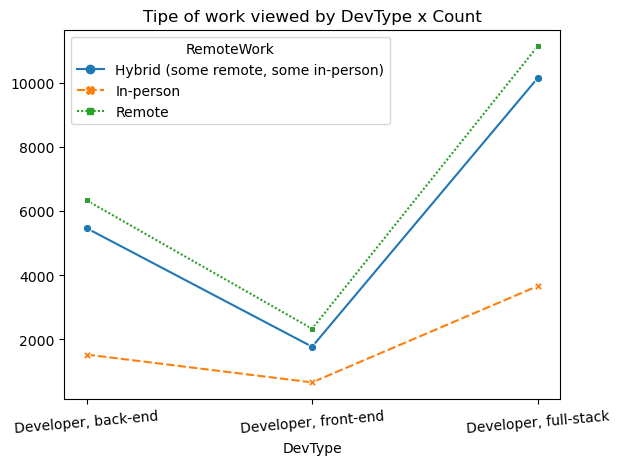

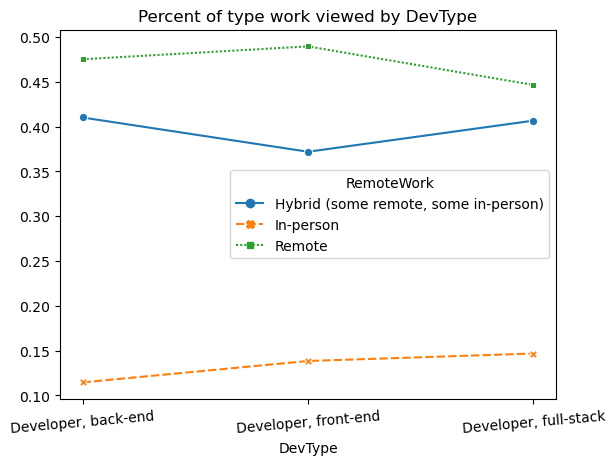

In [22]:
plot_bystack(df_char2,['Developer, full-stack','Developer, back-end','Developer, front-end'])


We can see that for professions in the software engineering field, all stacks have **remote** work being the most performed. And just like in the analysis by age, **in-person work is the least performed.**


`4.`How much does remote work relate to the country where you work?

In [23]:
df_char3 = df_survey[['RemoteWork','Country']]
df_char3 =df_survey.groupby(by=['Country','RemoteWork']).count()['ResponseId']
df_char3 = df_char3.reset_index().pivot('Country', 'RemoteWork', 'ResponseId')

In [24]:
# Function to see your type of work depending on the country
def plot_bycountry(df,countrys,rotation=5):
    temp = df[df.index.isin(countrys)]
    sns.lineplot(data=temp,markers=True).set_title('Tipe of work viewed by Country x Count')
    plt.xticks(rotation=rotation)
    plt.show()
    
    df_perc = df.div(df.sum(axis=1), axis=0)
    temp_perc = df_perc[df_perc.index.isin(countrys)]
    plt.xticks(rotation=rotation)
    sns.lineplot(data=temp_perc,markers=True).set_title('Percent of Type of work viewed by Country')
    plt.show()

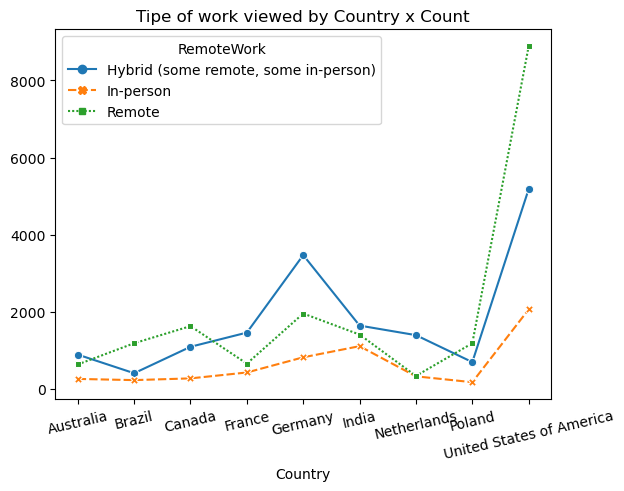

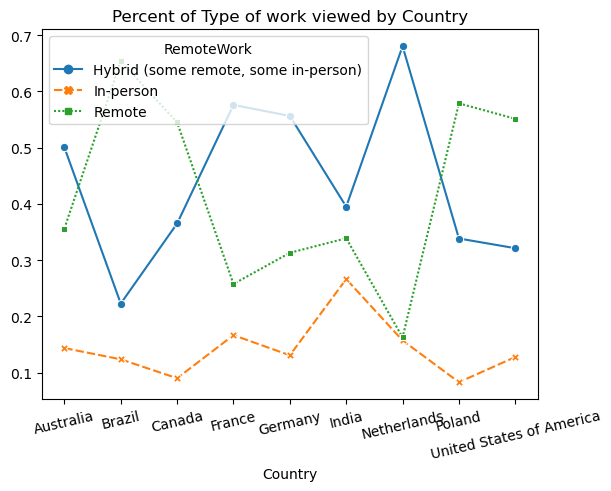

In [25]:
plot_bycountry(df_char3,['Brazil','Poland','France','Canada','Germany','United States of America','Australia','India','Netherlands'],13)

The top 10 countries were analyzed in relation to the number of responses.
We can note that the majority of respondents are from the United States and that **in-person work is also the least performed among all.** Interesting facts such as Brazil has the highest percentage of remote work practitioners says a lot about company cultures. Unlike Germany being the second largest respondent with the hybrid being the most executed.


`5.` In-person work pays more than remote work? We will see this relationship according to the countries that pay the most according to the work model. 


In [26]:

def work_exp_country_type(countries):
    df_char4 = df_survey[['RemoteWork','WorkExp','Country']]
    df_char4 = df_char4[df_char4['Country'].isin(countries)]
    df_char4['RemoteWork'] = df_char4['RemoteWork'].dropna()
    df_char4 =df_char4.groupby(by=['Country','RemoteWork']).mean()['WorkExp']
    df_char4 = df_char4.reset_index().pivot('Country','RemoteWork','WorkExp')
    return df_char4

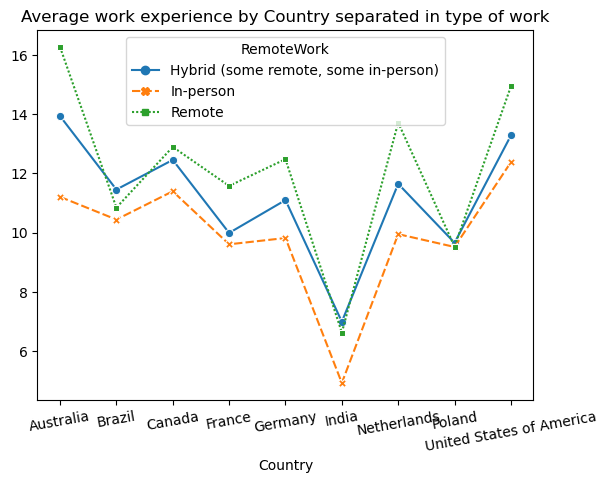

In [27]:
df_char4_1 = work_exp_country_type(['Brazil','Poland','France','Canada','Germany','United States of America','Australia','India','Netherlands'])
sns.lineplot(data=df_char4_1,markers=True,estimator='median').set_title('Average work experience by Country separated in type of work')
plt.xticks(rotation=10)
plt.show()
    

In [28]:
# typework = 'Hybrid (some remote, some in-person)', 'In-person', 'Remote'
def work_exp_country_type(typework):
    df_char5 = df_survey[['RemoteWork','ConvertedCompYearly','Country']]
    df_char5 = df_char5[df_char5['Country']!='Mali']
    df_char5 =df_char5.groupby(by=['Country','RemoteWork']).mean()['ConvertedCompYearly']
    df_char5 = df_char5.reset_index().pivot('Country','RemoteWork','ConvertedCompYearly')
    df_char5 = df_char5[[typework]]
    df_char5 = df_char5.sort_values(by=typework,ascending=False).head(10)
    df_char5 = df_char5.round(0)
    return df_char5

In [29]:
df_char5=work_exp_country_type('Hybrid (some remote, some in-person)')

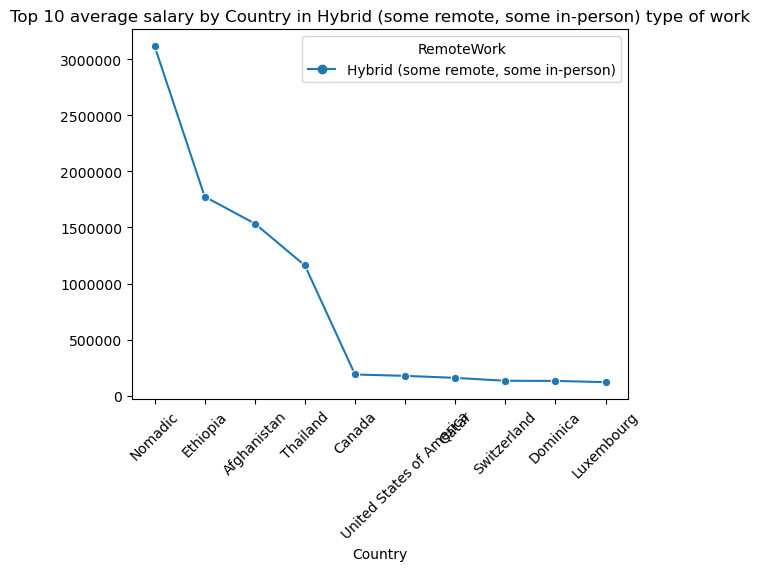

In [30]:
df_char5_1 = work_exp_country_type('Hybrid (some remote, some in-person)')
sns.lineplot(data=df_char5_1,markers=True,estimator='median').set_title(f'Top 10 average salary by Country in Hybrid (some remote, some in-person) type of work')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


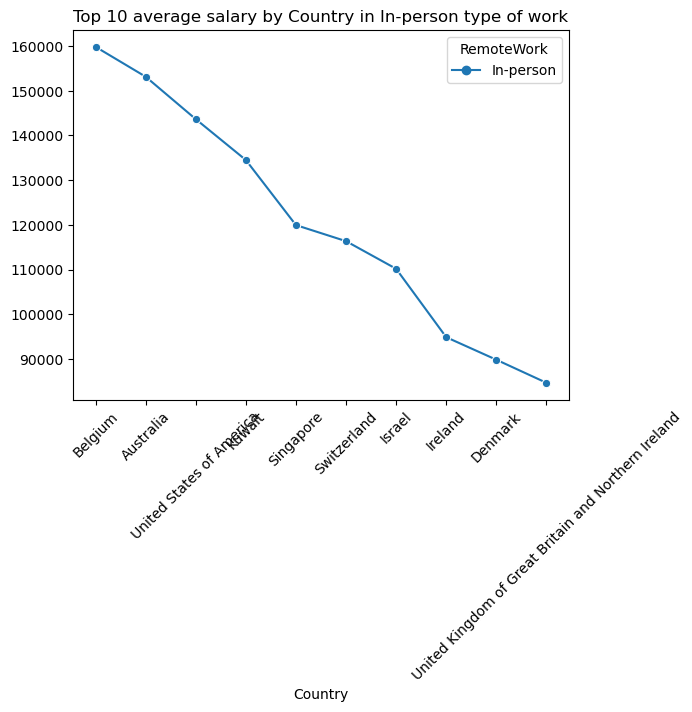

In [31]:
df_char5_2 = work_exp_country_type('In-person')
sns.lineplot(data=df_char5_2,markers=True,estimator='median').set_title(f'Top 10 average salary by Country in In-person type of work')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


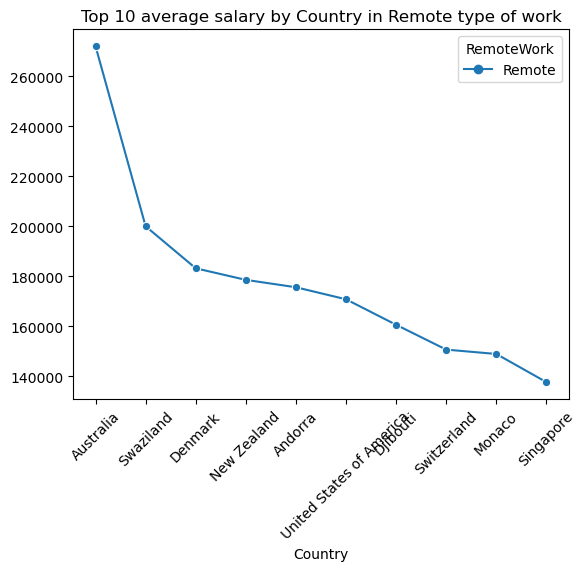

In [32]:
df_char5_3 = work_exp_country_type('Remote')
sns.lineplot(data=df_char5_3,markers=True,estimator='median').set_title(f'Top 10 average salary by Country in Remote type of work')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()



# We can see that the lowest average payer would be for in-person model work. And we can also note four outlier countries in the hybrid model.
# But this shows that the best talents reported directly to the people with the highest salaries may have the option to choose their salary style, due to their high demand for companies, and these talents tend to choose days worked from home.